In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from v2.research.scripts.scoreboard import updateScoreboard
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance


/home/marshingjay/Repos/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "haymaker"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('rsi', 'close'),('optimal_v2', 'close')],
                            param_spec={'rsi':{'period': 10}},
                            optimal_threshold={'buy':0.97},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10,30]},
                                    {'indicator_name':'psar',
                                    'column_name': 'close',
                                    'param_name': 'acceleration',
                                    'param_values': [0.05]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10,30,60]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,30]},
                                    {'indicator_name':'natr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [30,60,120,180]},
                                    {'indicator_name':'cmo',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,60]}
                                    
                                    ],

                            scale='minmaxwindow')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from BTCUSDT-1m...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from chunk 6...
Loading data from chunk 7...
Loading data from chunk 8...
Loading data from chunk 9...
Loading data from chunk 10...


In [4]:
features

['RSI',
 'WILLR_close_period_10',
 'WILLR_close_period_30',
 'PSAR_close_acceleration_0.05',
 'CCI_close_period_10',
 'CCI_close_period_30',
 'CCI_close_period_60',
 'RSI_close_period_2',
 'RSI_close_period_3',
 'RSI_close_period_5',
 'RSI_close_period_10',
 'RSI_close_period_30',
 'NATR_close_period_30',
 'NATR_close_period_60',
 'NATR_close_period_120',
 'NATR_close_period_180',
 'CMO_close_period_2',
 'CMO_close_period_3',
 'CMO_close_period_5',
 'CMO_close_period_10',
 'CMO_close_period_60']

In [5]:
dataset.drop(["time", "open", "high", "low", "volume"], axis=1, inplace=True)
dataset.dropna(inplace=True)
dataset

,close,RSI,optimal,WILLR_close_period_10,WILLR_close_period_30,PSAR_close_acceleration_0.05,CCI_close_period_10,CCI_close_period_30,CCI_close_period_60,RSI_close_period_2,...,RSI_close_period_30,NATR_close_period_30,NATR_close_period_60,NATR_close_period_120,NATR_close_period_180,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
15179,3499.451907,0.265069,0.0,0.597535,0.008918,0.531871,0.401253,0.441369,0.634824,0.061887,...,0.316863,0.130093,0.144570,0.149913,0.161489,0.061887,0.028527,0.058300,0.176657,0.406218
15180,3499.480953,0.265069,0.0,0.597687,0.009518,0.523602,0.417499,0.445325,0.638129,0.116448,...,0.317142,0.125280,0.141351,0.147881,0.159940,0.116448,0.045183,0.063827,0.178057,0.406367
15181,3499.495477,0.265069,0.0,0.597763,0.009818,0.517020,0.429495,0.445433,0.640944,0.165011,...,0.317287,0.120607,0.138174,0.145859,0.158394,0.165011,0.057304,0.067249,0.178833,0.406443
15182,3501.247738,0.393088,0.0,0.622832,0.045999,0.484190,0.614453,0.465052,0.655268,0.941458,...,0.334926,0.123457,0.139544,0.146578,0.158870,0.941458,0.714128,0.398706,0.271062,0.415660
15183,3502.123869,0.393088,0.0,0.633669,0.064090,0.481218,0.607448,0.460668,0.652634,0.969665,...,0.343744,0.120034,0.137105,0.144975,0.157616,0.969665,0.812243,0.507982,0.313886,0.420276
15184,3511.061935,0.705685,0.0,0.673202,0.248646,0.448935,0.909351,0.519867,0.687220,0.997199,...,0.425834,0.127830,0.141321,0.147201,0.159036,0.997199,0.969969,0.851690,0.588348,0.465554
15185,3515.530967,0.705685,0.0,0.702146,0.462363,0.439453,0.755870,0.533463,0.691707,0.998532,...,0.461724,0.129192,0.141790,0.147288,0.158966,0.998532,0.981576,0.896764,0.663304,0.486892
15186,3527.765484,0.833755,0.0,0.690514,0.701452,0.399405,0.773141,0.594236,0.726521,0.999593,...,0.545491,0.141115,0.148571,0.151020,0.161445,0.999593,0.992879,0.949394,0.783512,0.541106
15187,3528.882742,0.673860,0.0,0.694219,0.728715,0.415945,0.670810,0.578007,0.720209,0.999640,...,0.552292,0.137419,0.146170,0.149489,0.160253,0.999640,0.993431,0.952177,0.791096,0.545789
15188,3529.441371,0.673860,0.0,0.696029,0.742347,0.431504,0.635333,0.573206,0.721652,0.999678,...,0.555746,0.133084,0.143355,0.147709,0.158884,0.999678,0.993792,0.953766,0.795085,0.548149


In [6]:
trainX, testX, trainy, testy = nu.splitData(dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':4, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,RSI,WILLR_close_period_10,WILLR_close_period_30,PSAR_close_acceleration_0.05,CCI_close_period_10,CCI_close_period_30,CCI_close_period_60,RSI_close_period_2,RSI_close_period_3,...,RSI_close_period_30,NATR_close_period_30,NATR_close_period_60,NATR_close_period_120,NATR_close_period_180,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
0,7349.210390,0.415123,0.303255,0.085398,0.562630,0.534486,0.424114,0.473783,0.466227,0.467650,...,0.457599,0.044013,0.052024,0.072448,0.091270,0.466227,0.467650,0.414918,0.399062,0.459673
1,6456.111574,0.550759,0.168436,0.359299,0.537696,0.419202,0.634081,0.562366,0.333433,0.471471,...,0.597680,0.101277,0.132984,0.186204,0.222226,0.333433,0.471471,0.557072,0.614231,0.559732
2,3434.622978,0.406093,0.463249,0.198317,0.534604,0.449378,0.436000,0.388160,0.136104,0.302517,...,0.235455,0.243847,0.247710,0.200840,0.159689,0.136104,0.302517,0.395003,0.326779,0.218479
3,6020.696557,0.396612,0.064789,0.291477,0.446697,0.275093,0.395402,0.389754,0.009630,0.055686,...,0.502666,0.052340,0.061456,0.069694,0.073397,0.009630,0.055686,0.176881,0.367216,0.529661
4,6639.226351,0.522353,0.323565,0.594670,0.565274,0.376149,0.459185,0.444806,0.071324,0.218909,...,0.559992,0.080743,0.109676,0.129548,0.143084,0.071324,0.218909,0.398247,0.544070,0.530494
5,7327.010528,0.233717,0.270988,0.162150,0.658949,0.145027,0.309464,0.351503,0.006273,0.035134,...,0.211084,0.342898,0.343579,0.396513,0.430703,0.006273,0.035134,0.101194,0.179012,0.190677
6,9717.415938,0.628554,0.834679,0.936567,0.338590,0.632956,0.720894,0.650471,0.965033,0.855436,...,0.689652,0.260972,0.327750,0.448067,0.549841,0.965033,0.855436,0.740155,0.710049,0.621868
7,6922.028482,0.497439,0.283639,0.529438,0.453807,0.354208,0.515226,0.500155,0.022536,0.127474,...,0.572235,0.021296,0.018675,0.021487,0.028297,0.022536,0.127474,0.325115,0.500033,0.552541
8,10532.266845,0.498956,0.289300,0.721741,0.535758,0.304125,0.574801,0.492821,0.124382,0.196249,...,0.455864,0.325036,0.441901,0.594617,0.694183,0.124382,0.196249,0.348143,0.467054,0.463534
9,4821.529771,0.576076,0.598622,0.626959,0.397299,0.405496,0.448016,0.406916,0.069768,0.260291,...,0.555963,0.053119,0.027231,0.008716,0.005306,0.069768,0.260291,0.474606,0.589036,0.500187


In [7]:
dataset = []

In [8]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.625, 1: 2.5}

In [9]:
testX

,close,RSI,WILLR_close_period_10,WILLR_close_period_30,PSAR_close_acceleration_0.05,CCI_close_period_10,CCI_close_period_30,CCI_close_period_60,RSI_close_period_2,RSI_close_period_3,...,RSI_close_period_30,NATR_close_period_30,NATR_close_period_60,NATR_close_period_120,NATR_close_period_180,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
1189980,8803.176664,0.445331,0.306434,0.502229,0.226197,0.359830,0.423585,0.520778,0.066308,0.158630,...,0.574761,0.079571,0.138354,0.216465,0.306044,0.066308,0.158630,0.280784,0.442832,0.593998
1189981,8797.813332,0.393629,0.232513,0.394611,0.231644,0.290025,0.339953,0.506487,0.027616,0.087692,...,0.548068,0.079324,0.137880,0.215973,0.305513,0.027616,0.087692,0.193917,0.372266,0.580324
1189982,8791.921666,0.346678,0.199752,0.299806,0.236206,0.264596,0.267979,0.490210,0.012102,0.050476,...,0.520451,0.079409,0.137685,0.215703,0.305192,0.012102,0.050476,0.136003,0.311420,0.565691
1189983,8791.120833,0.404986,0.175320,0.286919,0.232747,0.323490,0.277831,0.486802,0.010498,0.046455,...,0.516777,0.077507,0.135811,0.214042,0.303517,0.010498,0.046455,0.129425,0.303897,0.563719
1189984,8785.815416,0.335089,0.102928,0.201547,0.233898,0.339093,0.271563,0.476041,0.003809,0.025918,...,0.492857,0.076789,0.134939,0.213231,0.302696,0.003809,0.025918,0.092354,0.257893,0.550742
1189985,8783.577708,0.346695,0.044341,0.023692,0.231148,0.349429,0.270736,0.466181,0.002477,0.020248,...,0.483062,0.074657,0.132870,0.211436,0.300929,0.002477,0.020248,0.080206,0.240744,0.545335
1189986,8784.268854,0.398221,0.073925,0.038497,0.225443,0.392559,0.312774,0.470875,0.179622,0.110298,...,0.486901,0.072458,0.130686,0.209481,0.298950,0.179622,0.110298,0.124575,0.258113,0.547155
1189987,8782.134427,0.358709,0.007460,0.000000,0.224095,0.397199,0.320855,0.465966,0.085663,0.077354,...,0.477257,0.070417,0.128642,0.207680,0.297168,0.085663,0.077354,0.104996,0.239727,0.541910
1189988,8772.887214,0.261774,0.258349,0.199926,0.231694,0.270774,0.259694,0.431357,0.015483,0.026280,...,0.438103,0.074012,0.131262,0.209584,0.298845,0.015483,0.026280,0.056562,0.178142,0.519810
1189989,8768.128607,0.260465,0.299803,0.185163,0.232402,0.228355,0.245779,0.410898,0.008400,0.017396,...,0.419620,0.076254,0.132777,0.210566,0.299606,0.008400,0.017396,0.043536,0.155114,0.508859


In [10]:
clf = RandomForestClassifier(random_state=69420, class_weight=class_weights, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)
clf.fit(trainX.drop("close", axis=1).values, trainy.values)

print(clf.score(testX.drop("close", axis=1).values, testy.values))

feature_importances = permutation_importance(clf, trainX.drop("close", axis=1).values, trainy.values, n_repeats=10, random_state=69420)

for i in range(len(feature_importances.importances_mean)):
    print('i: {}, Feature: {}, Score: {}'.format(i, trainX.drop("close", axis=1).columns[i], feature_importances.importances_mean[i]))

0.9172763929243302
i: 0, Feature: RSI, Score: 0.027952546533033317
i: 1, Feature: WILLR_close_period_10, Score: 0.022542442217222302
i: 2, Feature: WILLR_close_period_30, Score: 0.009322969932501524
i: 3, Feature: PSAR_close_acceleration_0.05, Score: 0.01703620372264265
i: 4, Feature: CCI_close_period_10, Score: 0.022730619758641823
i: 5, Feature: CCI_close_period_30, Score: 0.009140928615258725
i: 6, Feature: CCI_close_period_60, Score: 0.008596850071589246
i: 7, Feature: RSI_close_period_2, Score: 0.11408877070975658
i: 8, Feature: RSI_close_period_3, Score: 0.03875639190018405
i: 9, Feature: RSI_close_period_5, Score: 0.053188791163837165
i: 10, Feature: RSI_close_period_10, Score: 0.006968705256698693
i: 11, Feature: RSI_close_period_30, Score: 0.009353651053385125
i: 12, Feature: NATR_close_period_30, Score: 0.03857230517488236
i: 13, Feature: NATR_close_period_60, Score: 0.03013295152382898
i: 14, Feature: NATR_close_period_120, Score: 0.012929024340355876
i: 15, Feature: NATR_cl

In [53]:
reduced_classified_data = nu.classifyPoints(clf, testX, predict_proba=True, proba_thresh=0.75, plot_optimal=False, optimal=testy)

In [54]:
smaller_view_data = reduced_classified_data[15000:20000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

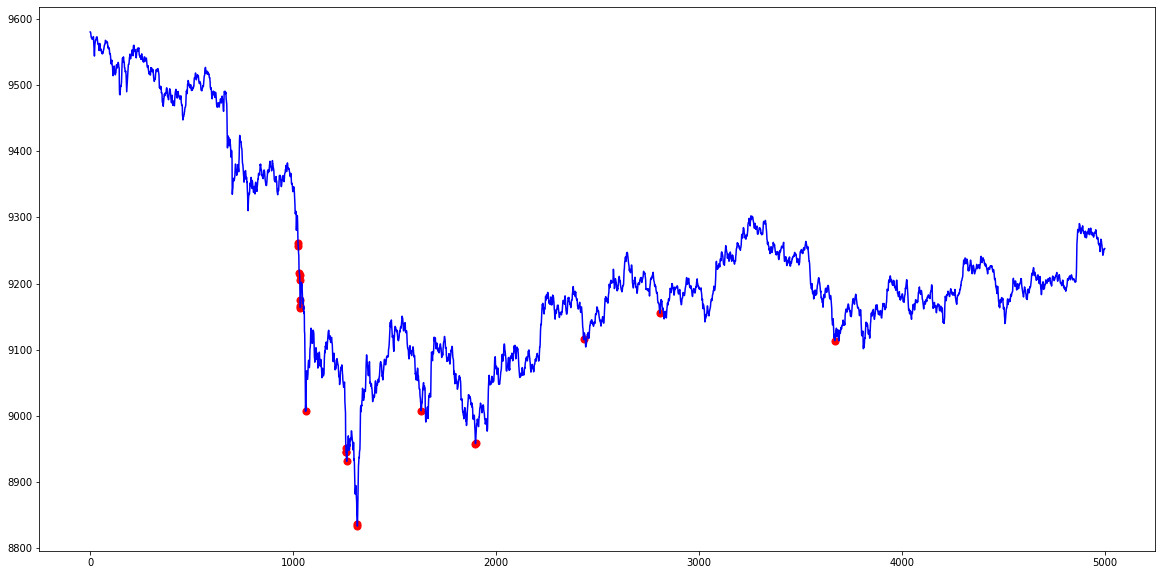

In [55]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=False)

In [14]:
features

['RSI',
 'WILLR_close_period_10',
 'WILLR_close_period_30',
 'PSAR_close_acceleration_0.05',
 'CCI_close_period_10',
 'CCI_close_period_30',
 'CCI_close_period_60',
 'RSI_close_period_2',
 'RSI_close_period_3',
 'RSI_close_period_5',
 'RSI_close_period_10',
 'RSI_close_period_30',
 'NATR_close_period_30',
 'NATR_close_period_60',
 'NATR_close_period_120',
 'NATR_close_period_180',
 'CMO_close_period_2',
 'CMO_close_period_3',
 'CMO_close_period_5',
 'CMO_close_period_10',
 'CMO_close_period_60']

In [57]:
model_version = nu.exportModel(clf, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=0.6, is_nn=False)

In [16]:
# score, trades = nu.testModel(model_name)

In [17]:
# updateScoreboard(model_name, model_version, score, trades, features)